In [225]:
import collections
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

%matplotlib inline

In [226]:
env = gym.make('Blackjack-v1', sab=True, ) # render_mode="human")

In [227]:
def play_env(env, agent):
    terminated = False
    observation, info = env.reset()

    while not terminated:
        action = agent.action(observation)

        new_observation, reward, terminated, truncated, info = env.step(action)

        agent.observe(observation, reward)

        observation = new_observation
    
    agent.estimating()

In [228]:
class MCFirstVisit():

    def __init__(self, gamma, policy):
        self.gamma  = gamma
        self.policy = policy

        self.state_value = collections.defaultdict(lambda: 0)
        self.returns = collections.defaultdict(lambda: [])

        self.states = []
        self.rewards = []

    def action(self, state):
        return self.policy(state)
    
    def observe(self, state, reward):
        self.states.append(state)
        self.rewards.append(reward)
    
    def estimating(self):
        g = self.rewards[-1]

        for t in range(len(self.states) - 2, -1, -1):
            g = self.gamma * g + self.rewards[t]

            self.returns[self.states[t]].append(g)
            self.state_value[self.states[t]] = sum(self.returns[self.states[t]]) / len(self.returns[self.states[t]])
        
        self.states = []
        self.rewards = []


In [229]:
# Create a random policy
def random_policy(state):
    return np.random.randint(low=0, high=1, size=(1))[0]

def stick_policy(state):
    player_score = state[0]
    if player_score in [20, 21]:
        return 0
    else:
        return 1 

agent = MCFirstVisit(gamma=1, policy=stick_policy)

play_env(env, agent)

In [230]:
agent.state_value

defaultdict(<function __main__.MCFirstVisit.__init__.<locals>.<lambda>()>, {})

In [231]:
for i in range(500_000):
    play_env(env, agent)

In [232]:
len(agent.state_value)

240

In [233]:
agent.state_value

defaultdict(<function __main__.MCFirstVisit.__init__.<locals>.<lambda>()>,
            {(14, 9, 0): -0.22818791946308725,
             (18, 9, 0): 0.3872340425531915,
             (18, 9, 1): -0.3767123287671233,
             (14, 9, 1): -0.37755102040816324,
             (14, 1, 0): -0.38301886792452833,
             (13, 6, 0): -0.375,
             (13, 6, 1): -0.3300970873786408,
             (18, 7, 0): 0.33984375,
             (15, 7, 0): -0.20232558139534884,
             (14, 7, 0): -0.28545780969479356,
             (5, 7, 0): -0.5154639175257731,
             (12, 9, 0): -0.3108108108108108,
             (18, 4, 1): -0.48,
             (7, 4, 0): -0.5168539325842697,
             (15, 5, 0): -0.19868995633187772,
             (15, 10, 0): -0.24376731301939059,
             (6, 10, 0): -0.5463917525773195,
             (16, 10, 0): -0.1541005291005291,
             (9, 10, 0): -0.5306284805091488,
             (13, 10, 0): -0.3679409209383145,
             (18, 6, 0): 0.3020408

[[ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]
 [ 0  1  2  3  4  5  6  7  8  9 10 11]]
(24, 12)


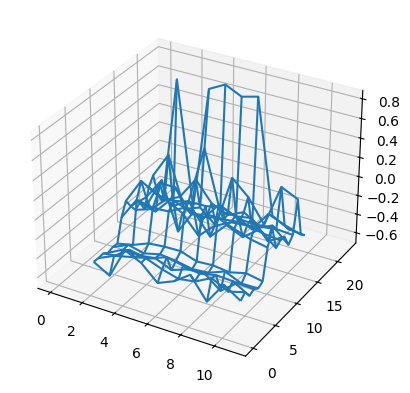

In [251]:
Z = np.zeros(shape=(24, 12)) * np.nan

for k in agent.state_value.keys():
    Z[k[0]][k[1]] = agent.state_value[k]

X, Y = np.meshgrid(np.arange(Z.shape[1]), np.arange(Z.shape[0]))
print(X)
print(Z.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_wireframe(X, Y, Z)

plt.show()